# 🎓 **Applied Artificial Intelligence Master**

## 🤖 **Course: Fintech and Digital Innovation in Finance (Gpo 10)**

### 🏛️ Tecnológico de Monterrey

#### 👨‍🏫 **Lead Professor:** Marie-Ève Malette
#### 👩‍🏫 **Assistant Professor:** Yetnalezi Quintas Ruiz

### 📊 **Project 1 Section B | Technical analysis on S&P 500 data**

#### 📅 **July 24th, 2025**

#### **Student:**
* 🧑‍💻 Oscar Enrique García García (A01016093)

# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np



## Get the list of stocks in the S&P 500 

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [4]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [6]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [7]:
# Load closing prices 
# Make sure you end this coding section by displaying your results: display(df_close)

df_close = yf.download(ticker_list, start=start_date, end=end_date)["Close"].dropna(how="all", axis=1)
display(df_close)

/var/folders/4h/h41r6p8s10x5w_ns6d2hznjr0000gq/T/ipykernel_77778/3270872642.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(ticker_list, start=start_date, end=end_date)["Close"].dropna(how="all", axis=1)
[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376266,168.283676,154.714767,156.160004,103.735451,91.096085,293.442108,469.390015,189.859940,55.668907,...,29.172791,91.453209,51.484390,111.217087,129.094406,66.839996,132.078354,118.202553,309.049988,156.223282
2024-05-02,136.217346,171.991287,153.844177,158.330002,103.374344,90.497009,295.092743,476.570007,192.405899,56.603554,...,29.955240,93.958237,51.493961,111.418365,134.052734,70.300003,131.824615,117.115036,312.709991,164.827881
2024-05-03,138.129074,182.279160,156.695114,159.710007,103.354828,89.774330,298.403870,486.179993,195.480637,56.431881,...,30.032520,95.378403,51.934326,111.188332,135.255371,69.470001,131.112152,120.278717,309.589996,164.670212
2024-05-06,139.278091,180.619171,155.681015,162.000000,103.101074,92.370285,300.712830,493.589996,199.093933,57.404682,...,30.022860,96.522438,52.039635,111.907227,137.217026,73.529999,132.907913,119.191200,315.790009,163.566284
2024-05-07,139.931854,181.305023,155.508820,159.809998,103.618340,93.387741,305.232452,492.269989,199.338745,58.739902,...,29.800682,95.891251,52.671459,111.351280,138.035187,71.599998,132.644409,120.051323,317.869995,166.030365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [8]:
# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)

df_ma50 = df_close.rolling(window=50).mean()
df_ma200 = df_close.rolling(window=200).mean()
display(df_ma50)
display(df_ma200)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,118.589774,219.229514,194.882049,128.497001,129.695852,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290147,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931158
2025-04-25,117.960953,218.678437,194.779480,128.136801,129.675178,91.7690,320.885378,399.492000,204.194042,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535975
2025-04-28,117.376369,218.051459,194.792595,127.782001,129.642279,91.7896,318.998219,397.680000,203.901113,46.480951,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320589


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.080366,227.101211,183.261852,130.701575,116.973860,96.197872,340.475851,478.509449,214.892000,52.358254,...,29.730782,85.165791,64.041626,111.437774,125.549300,72.28710,136.723923,106.728763,346.199799,172.881445
2025-04-25,132.988336,227.008163,183.380333,130.551875,117.119245,96.185332,340.478538,477.517949,214.720084,52.293548,...,29.719768,85.156247,64.130069,111.439660,125.467794,72.25500,136.835707,106.711042,345.854800,172.787551
2025-04-28,132.891064,226.898009,183.529515,130.409175,117.261134,96.177719,340.493396,476.538299,214.512771,52.222563,...,29.712475,85.151355,64.220807,111.437109,125.371802,72.22490,136.937422,106.688920,345.453200,172.697852


### Detecting Golden and Death Crosses in the last 14 days

In [9]:
# Define a function that detects golden and death crosses in the last 14 days for all stocks 

def detect_all_crosses(close, ma50, ma200):
    golden_crosses = []
    death_crosses = []
    golden_dates = {}
    death_dates = {}

    for ticker in close.columns:
        cross_signal = (ma50[ticker] > ma200[ticker]).astype(int).diff()

        # Get last 14 days only
        recent_signal = cross_signal.iloc[-14:]

        # Detect Golden Crosses
        if (recent_signal == 1).any():
            golden_crosses.append(ticker)
            golden_dates[ticker] = recent_signal[recent_signal == 1].index.tolist()

        # Detect Death Crosses
        if (recent_signal == -1).any():
            death_crosses.append(ticker)
            death_dates[ticker] = recent_signal[recent_signal == -1].index.tolist()

    return golden_crosses, death_crosses, golden_dates, death_dates

golden_crosses, death_crosses, golden_dates, death_dates = detect_all_crosses(df_close, df_ma50, df_ma200)

print("✔ Golden Crosses:")
for ticker in golden_crosses:
    print(f"{ticker}: {golden_dates[ticker]}")

print("\n✖ Death Crosses:")
for ticker in death_crosses:
    print(f"{ticker}: {death_dates[ticker]}")

✔ Golden Crosses:
AMT: [Timestamp('2025-04-21 00:00:00')]
CI: [Timestamp('2025-04-30 00:00:00')]
EW: [Timestamp('2025-04-17 00:00:00')]
INVH: [Timestamp('2025-04-30 00:00:00')]
KDP: [Timestamp('2025-04-21 00:00:00')]
MDLZ: [Timestamp('2025-04-28 00:00:00')]
MOH: [Timestamp('2025-04-28 00:00:00')]
NEM: [Timestamp('2025-04-14 00:00:00')]
SBAC: [Timestamp('2025-04-29 00:00:00')]
SJM: [Timestamp('2025-04-25 00:00:00')]

✖ Death Crosses:
ACN: [Timestamp('2025-04-10 00:00:00')]
ADSK: [Timestamp('2025-04-11 00:00:00')]
AME: [Timestamp('2025-04-22 00:00:00')]
AMP: [Timestamp('2025-04-24 00:00:00')]
AMZN: [Timestamp('2025-04-22 00:00:00')]
APD: [Timestamp('2025-04-21 00:00:00')]
APO: [Timestamp('2025-04-17 00:00:00')]
AXP: [Timestamp('2025-04-22 00:00:00')]
BAC: [Timestamp('2025-04-16 00:00:00')]
BLK: [Timestamp('2025-04-16 00:00:00')]
CCL: [Timestamp('2025-04-22 00:00:00')]
CEG: [Timestamp('2025-04-22 00:00:00')]
CFG: [Timestamp('2025-04-15 00:00:00')]
CMI: [Timestamp('2025-04-23 00:00:00')]
C

In [10]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)

print('List of Golden crosses')

display(golden_dates)

List of Golden crosses


{'AMT': [Timestamp('2025-04-21 00:00:00')],
 'CI': [Timestamp('2025-04-30 00:00:00')],
 'EW': [Timestamp('2025-04-17 00:00:00')],
 'INVH': [Timestamp('2025-04-30 00:00:00')],
 'KDP': [Timestamp('2025-04-21 00:00:00')],
 'MDLZ': [Timestamp('2025-04-28 00:00:00')],
 'MOH': [Timestamp('2025-04-28 00:00:00')],
 'NEM': [Timestamp('2025-04-14 00:00:00')],
 'SBAC': [Timestamp('2025-04-29 00:00:00')],
 'SJM': [Timestamp('2025-04-25 00:00:00')]}

In [11]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)

print('List of Death Crosses')
display(death_dates)

List of Death Crosses


{'ACN': [Timestamp('2025-04-10 00:00:00')],
 'ADSK': [Timestamp('2025-04-11 00:00:00')],
 'AME': [Timestamp('2025-04-22 00:00:00')],
 'AMP': [Timestamp('2025-04-24 00:00:00')],
 'AMZN': [Timestamp('2025-04-22 00:00:00')],
 'APD': [Timestamp('2025-04-21 00:00:00')],
 'APO': [Timestamp('2025-04-17 00:00:00')],
 'AXP': [Timestamp('2025-04-22 00:00:00')],
 'BAC': [Timestamp('2025-04-16 00:00:00')],
 'BLK': [Timestamp('2025-04-16 00:00:00')],
 'CCL': [Timestamp('2025-04-22 00:00:00')],
 'CEG': [Timestamp('2025-04-22 00:00:00')],
 'CFG': [Timestamp('2025-04-15 00:00:00')],
 'CMI': [Timestamp('2025-04-23 00:00:00')],
 'CRM': [Timestamp('2025-04-14 00:00:00')],
 'CTSH': [Timestamp('2025-04-30 00:00:00')],
 'D': [Timestamp('2025-04-23 00:00:00')],
 'DAL': [Timestamp('2025-04-15 00:00:00')],
 'DIS': [Timestamp('2025-04-22 00:00:00')],
 'DOV': [Timestamp('2025-04-10 00:00:00')],
 'DVA': [Timestamp('2025-04-14 00:00:00')],
 'EMR': [Timestamp('2025-04-14 00:00:00')],
 'EOG': [Timestamp('2025-04-10 

#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

The first top companies (5) that had a golden cross in the last 14 days are:

- AMT
- CI
- EW
- INVH
- KDP

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days: 

The first 10 companies that had a death cross in the last 14 days are:

- ACN
- ADSK
- AME
- AMP
- AMZN
- APD
- APO
- AXP
- BAC
- BLK

### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot 

In [12]:
# Compute the volatility of every stock in the S&P 500 

returns = df_close.pct_change()
volatility_14d = returns[:].std() #Change to consider all dates and not just the last 14 days
display(volatility_14d.sort_values(ascending=False).head())

Ticker
SMCI    0.071376
COIN    0.052767
VST     0.047544
PLTR    0.045638
TSLA    0.045489
dtype: float64

#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

In [13]:
def plot_crosses(ticker_list, title, top_n):
    for ticker in ticker_list[:top_n]:  # Plot only top 5
        plt.figure(figsize=(12, 6))
        df_close[ticker].plot(label='Close Price', color='black')
        df_ma50[ticker].plot(label='MA50', linestyle='--')
        df_ma200[ticker].plot(label='MA200', linestyle='--')

        # Shade last 14 days
        plt.axvspan(df_close.index[-14], df_close.index[-1], color='gray', alpha=0.1)

        # Annotate volatility
        vol = volatility_14d[ticker] if ticker in volatility_14d else None
        if vol:
            plt.title(f"{ticker} ({title}) - Volatility (14d): {vol:.2%}")
        else:
            plt.title(f"{ticker} ({title})")

        plt.legend()
        plt.grid()
        plt.show()




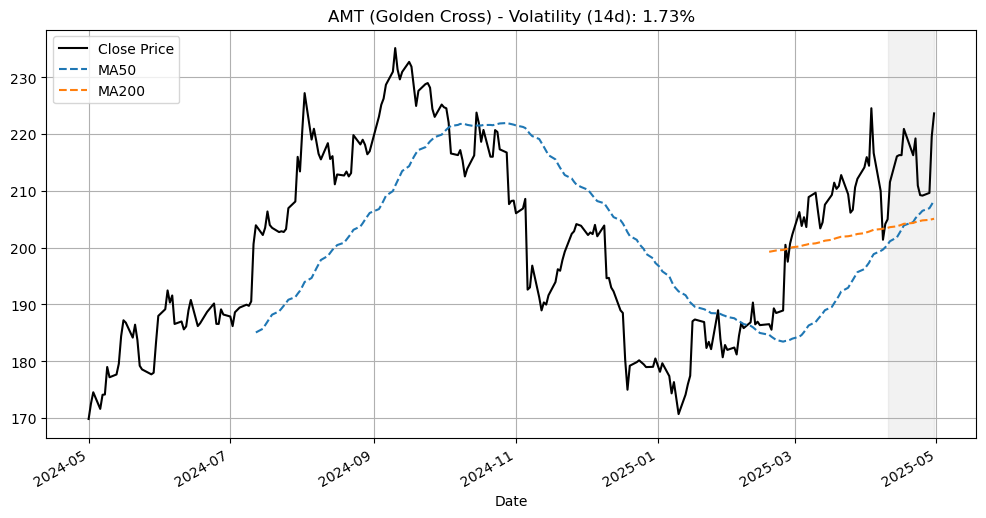

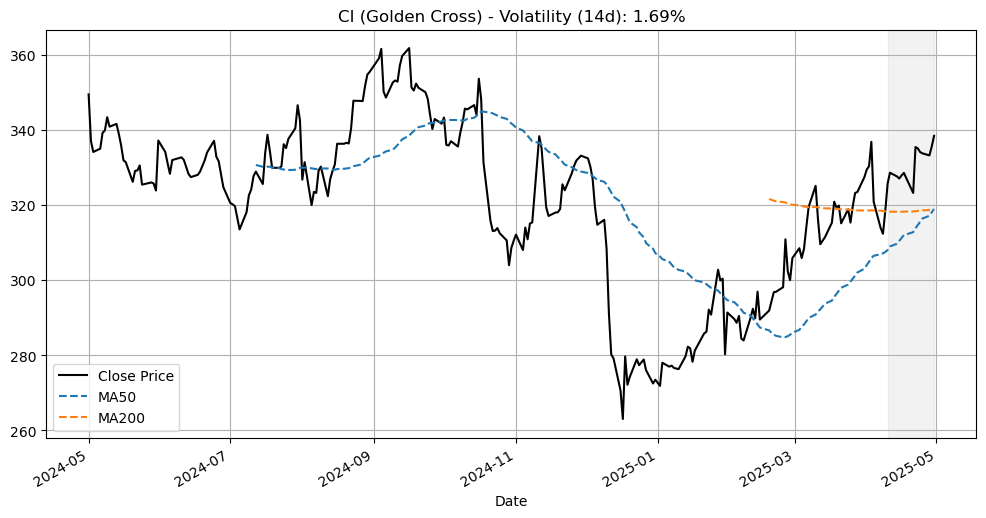

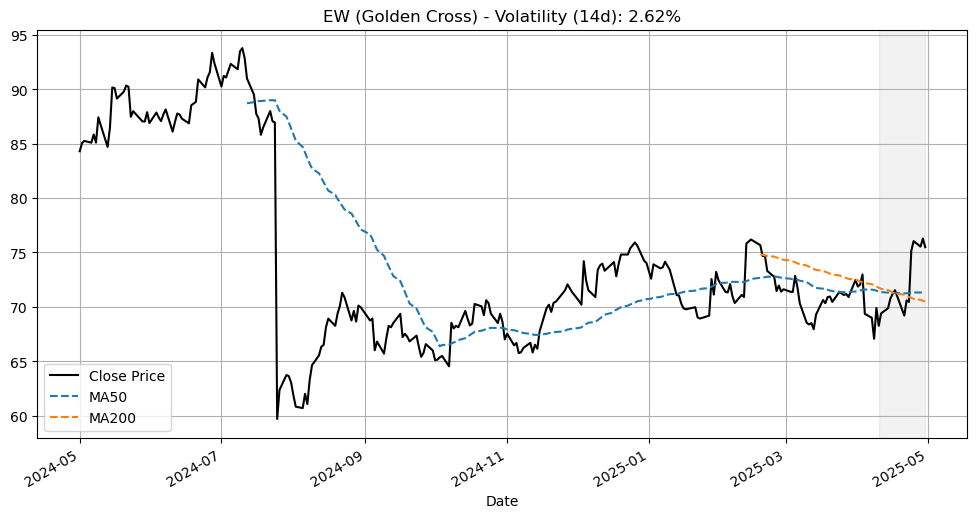

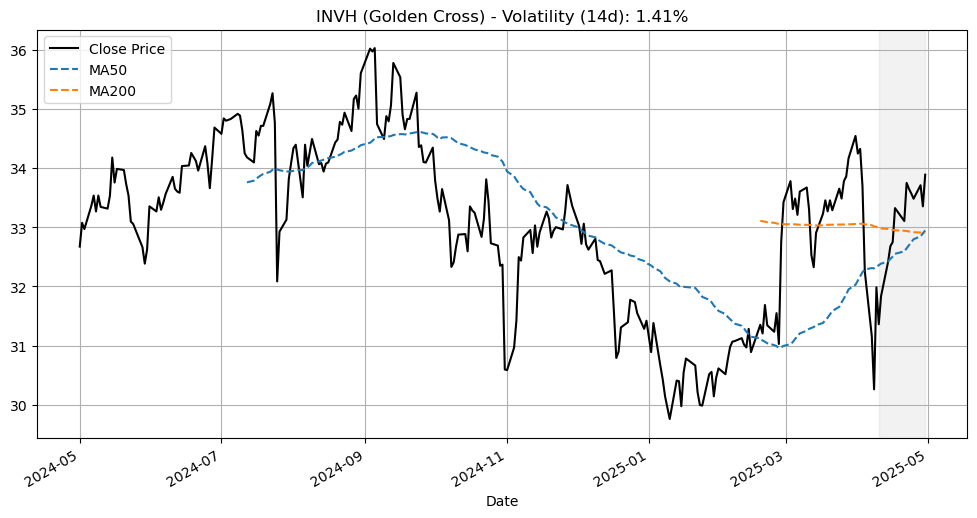

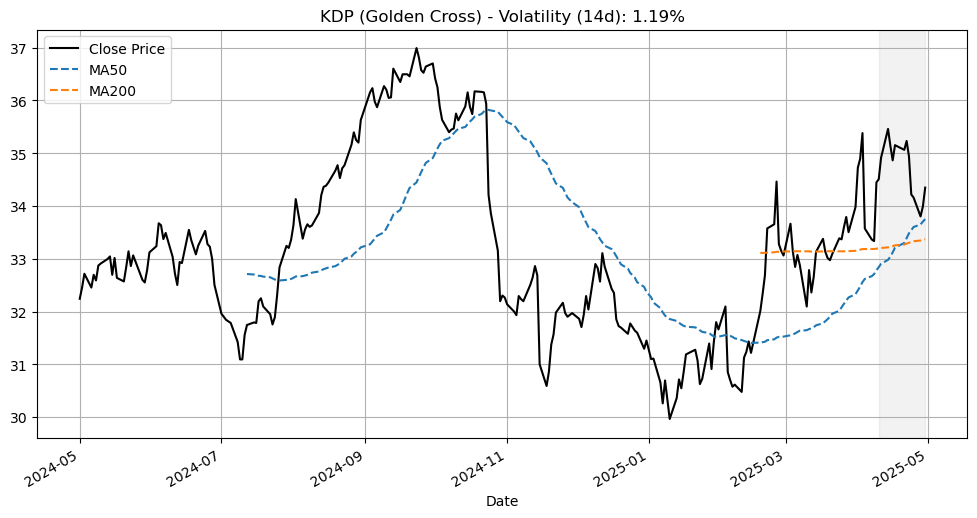

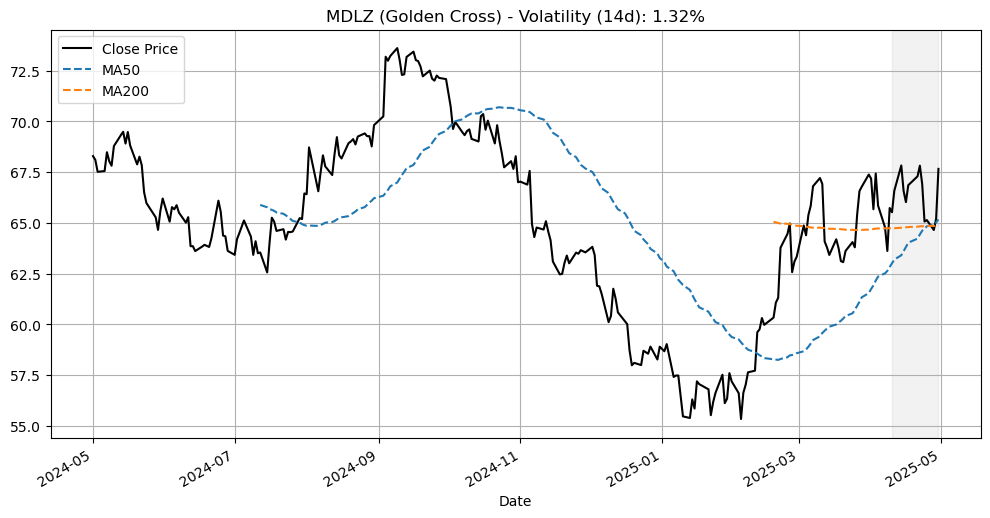

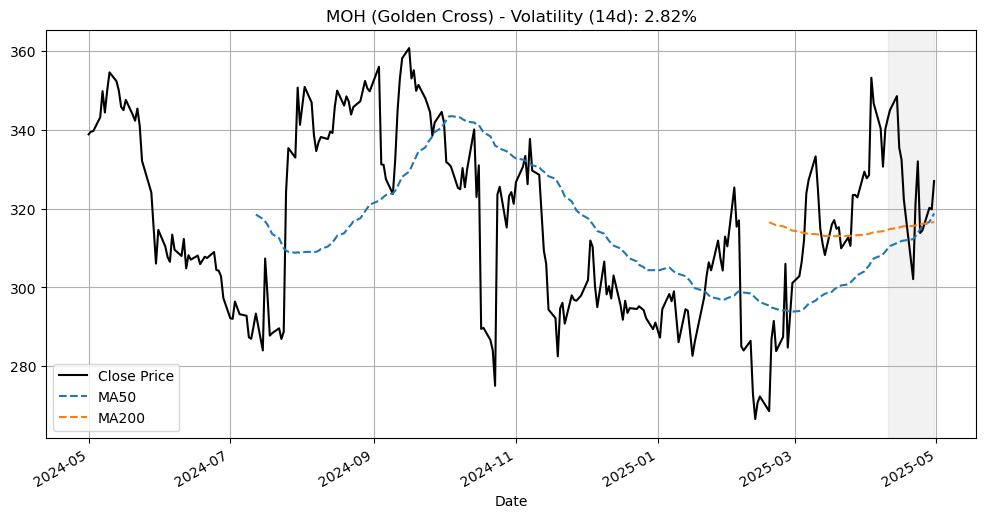

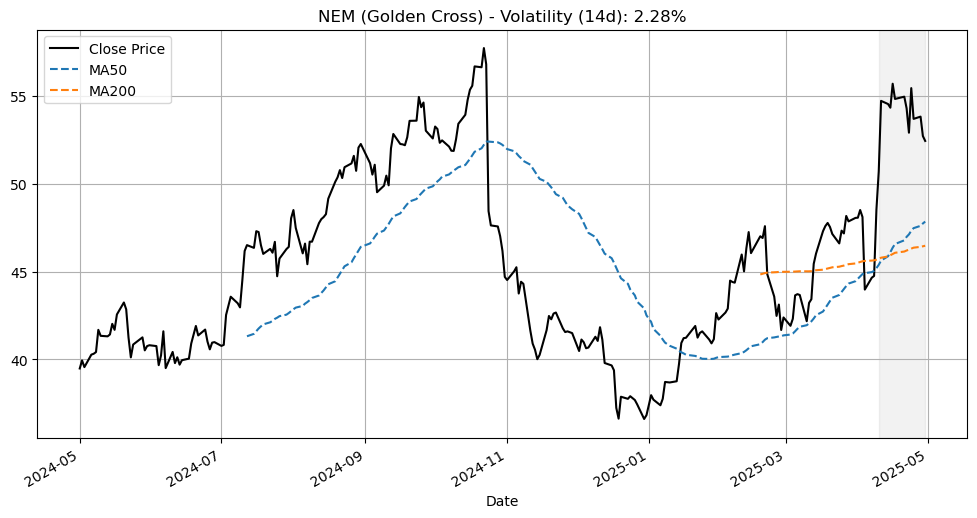

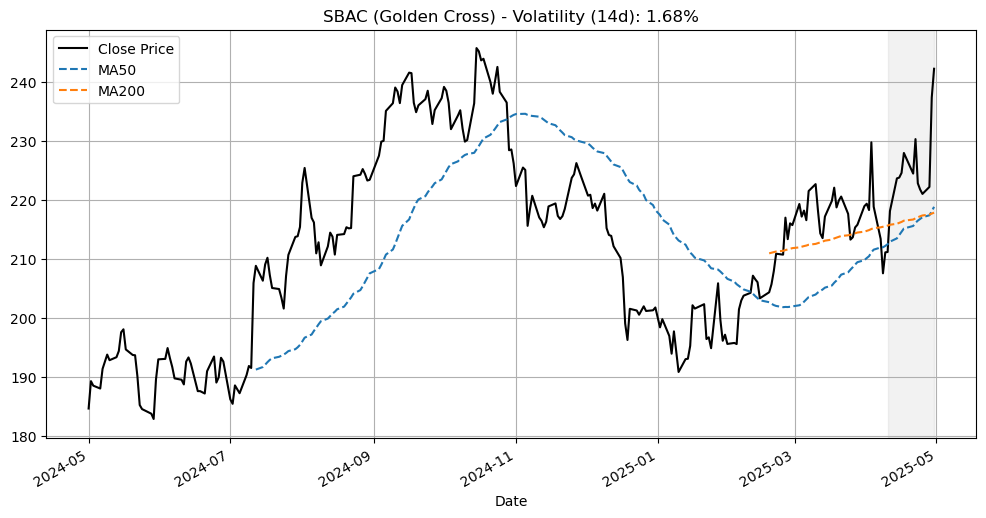

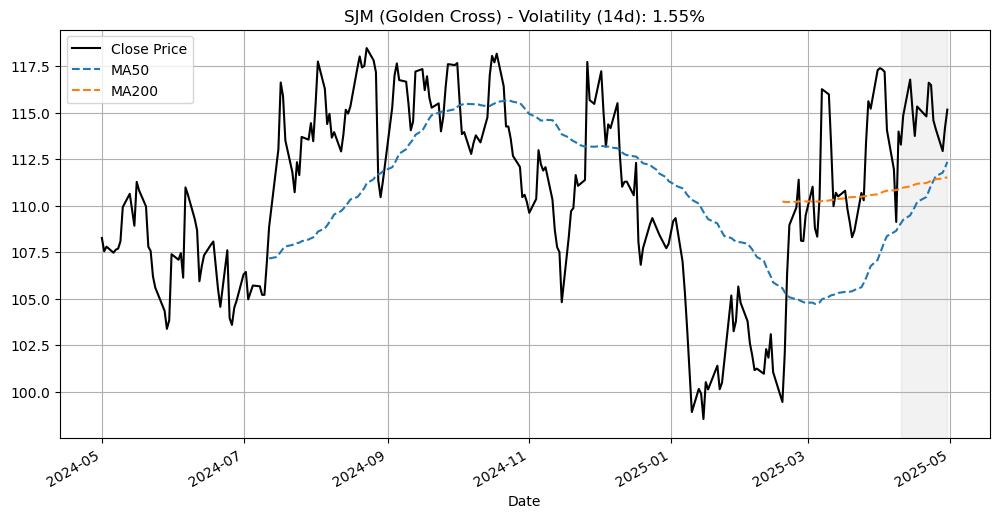

In [14]:
# CODE HERE
# Visualize the golden crosses results here

plot_crosses(golden_crosses, "Golden Cross", 10)

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

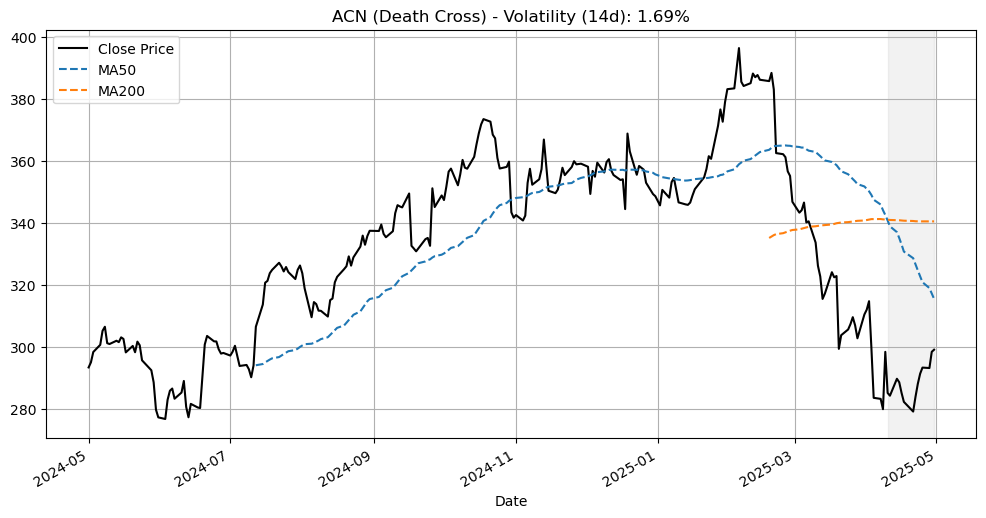

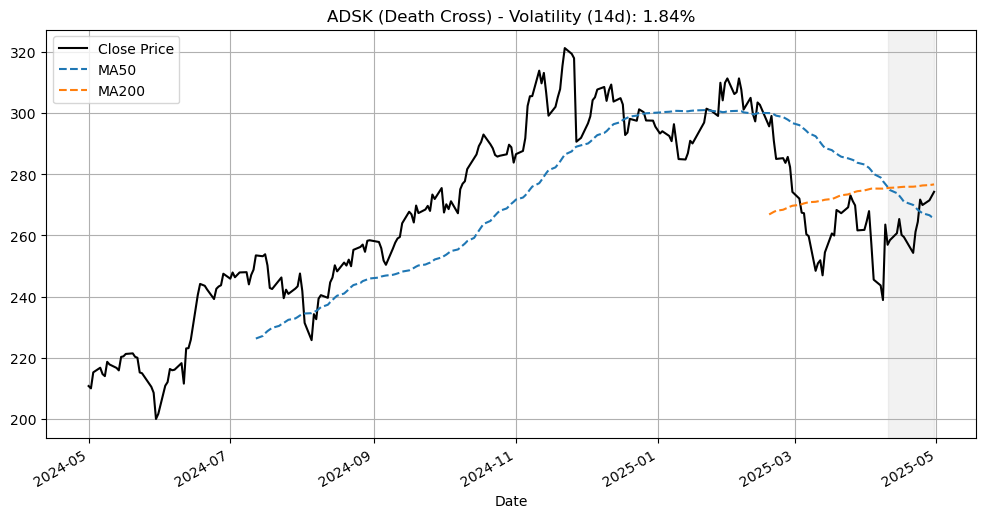

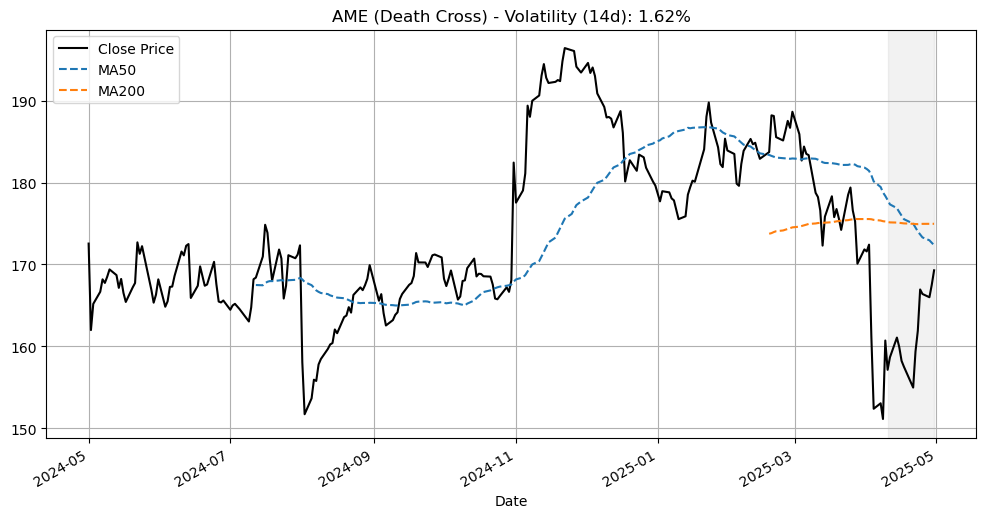

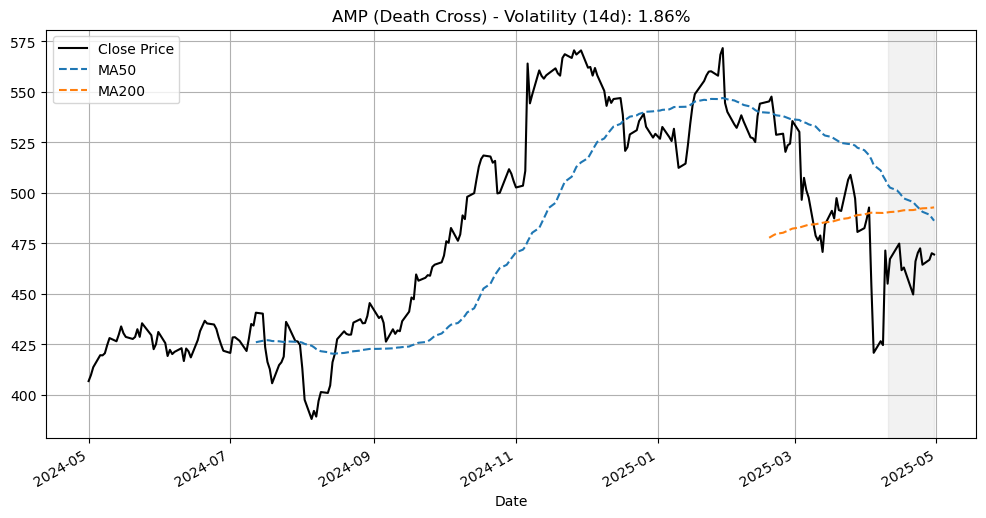

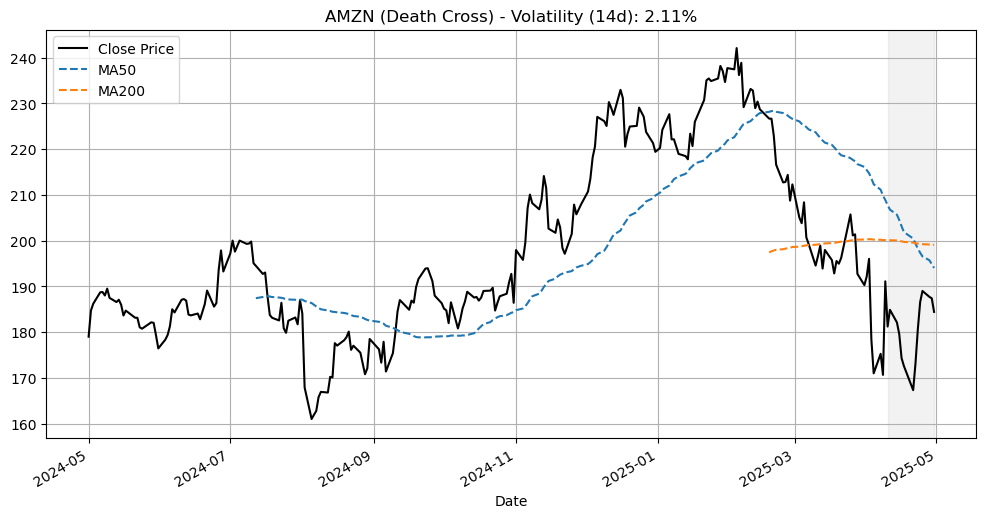

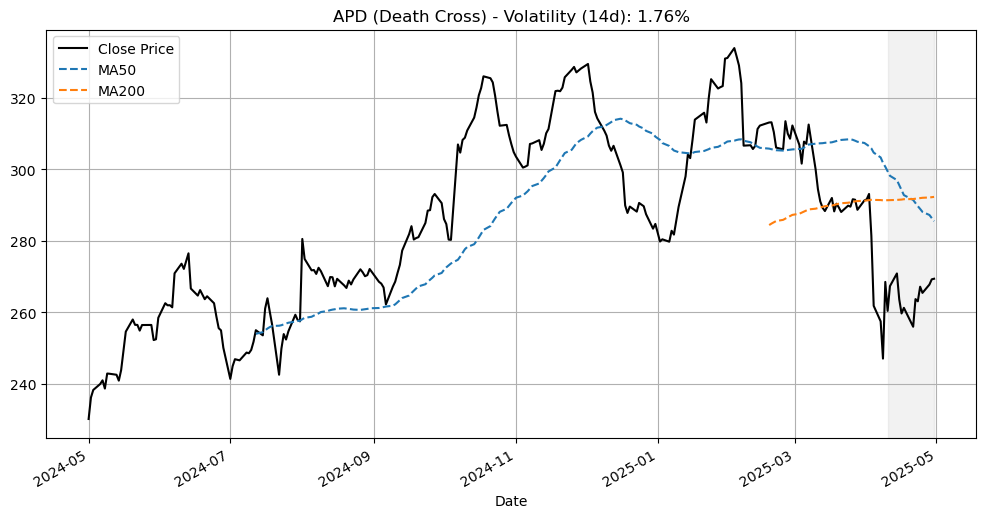

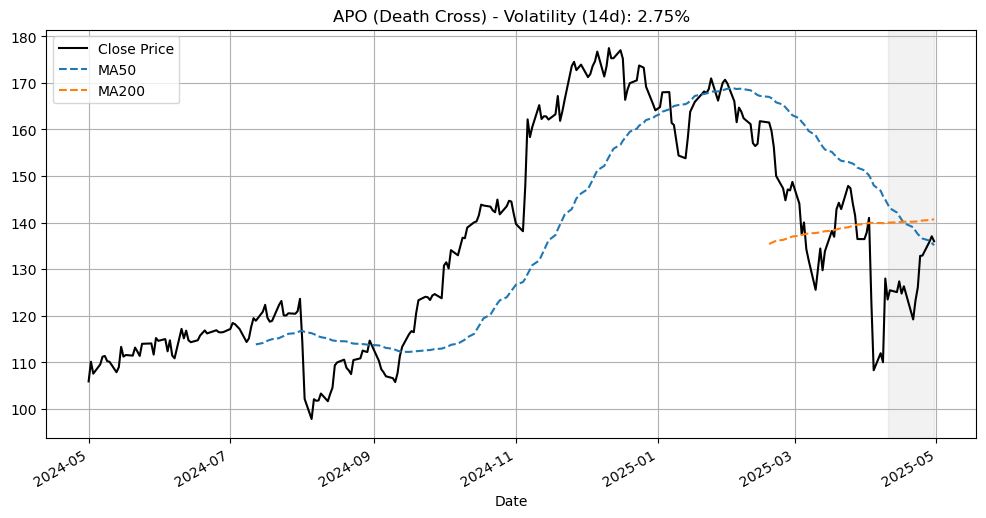

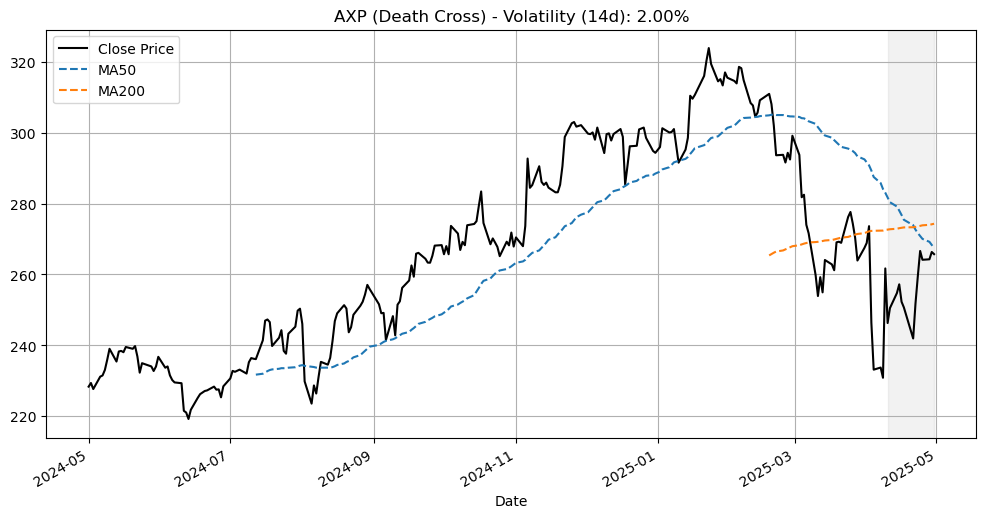

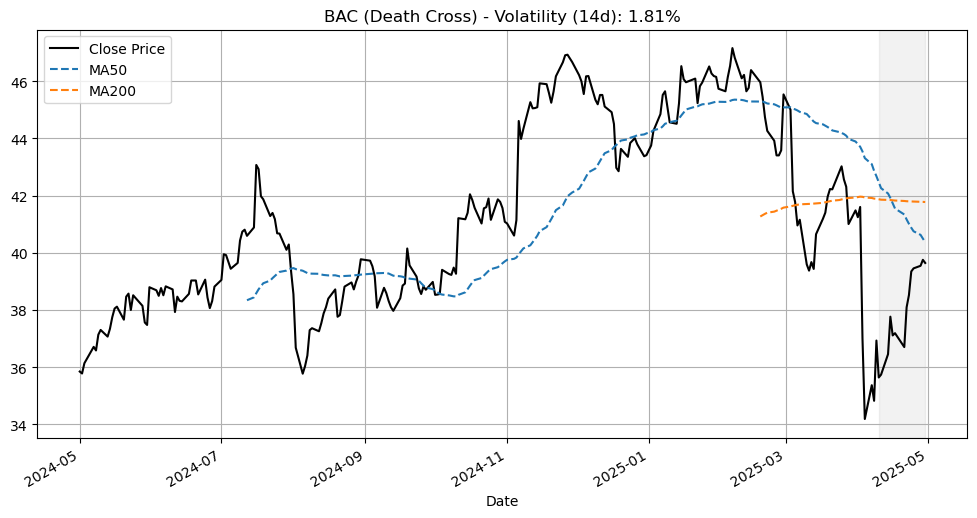

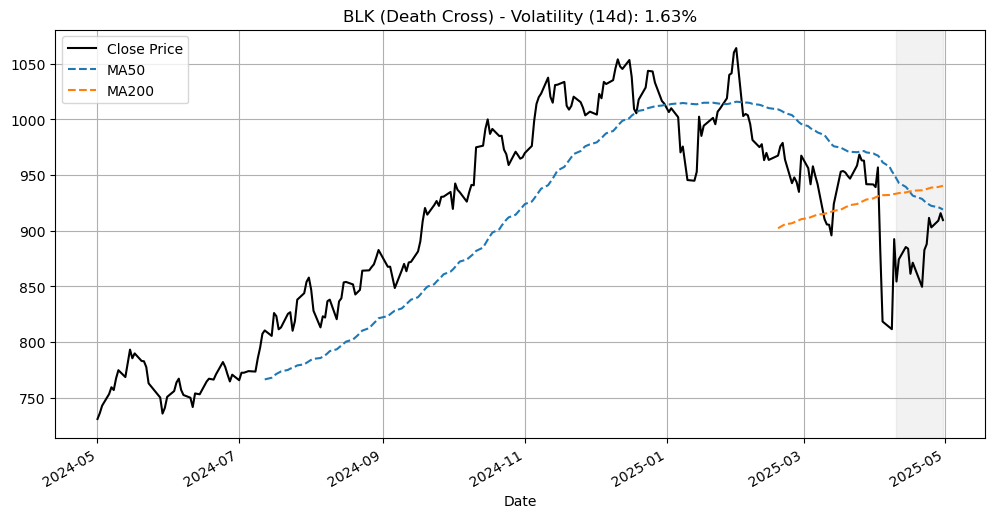

In [15]:
# Visualize the death crosses results here

plot_crosses(death_crosses, "Death Cross",10)

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross is a "bullish" (optimistic) technical signal that occurs when a short-term moving average (in our case: 50 days) crosses above a long-term average (in our case: 200 days).

It tipically suggests a potential upward trend in a stock's price and is often interpreted as a positive signal, possibly marking the start of long-term uptrend.


#### What is a Death Cross and how might market participants react to it?

A Death Cross is a "bearish" (pessimistic) technical signal that occurs when a short-term moving average (in our case: 50 days) crosses below the long-term moving average (in our case: 200 days). 

Opposite to the golden cross, it is often seen as a signal of potential future declines in stock's prices. In consequence, market participants might react by selling existing positions, avoiding new investmests, applying risk controls, etc.


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Moving averages reduce can reduce noice in stock's prices and, in consequence, can help identifying trends. The 50- and 200-day averages are usually used to capture short-term momentum and structural direction, respectively.


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

As we focus only in last 14 days, we can detect recent trend changes and, in consequence, take actions for the present days.


#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility can tell us how stable or erratic is a stock's price. If a stock's price has a high volatility might end in a false positive or an expected "behavior" instead of a reliable trend (postiive or negative).

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

We could simulate in a time window buying on Golden Crosses and selling later on a Death cross or a specific time and measure the win rate.

#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

Acting only based on technical indicators like moving averages can result on false positives (or negatives). News, earning reports, seasonality, etc. can affect directly the stock's prices and we should be totally aware of this.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

We should consider other factors in our analysis, like the analysis that we did in Section A, based on news, financial reports, etc. to make a more reliable decision in our investments.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Yes. Also as we say in Section A of the project, sentiment can also give us direction on the stock's prices or confirm what a Golden Cross or Death Cross can say about it. E.g. If a Golden Cross is mixed with bullish news, we can see this as a strong buy case.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

As we have been saying, all analyses should be combined with many other indicators and not in isolation. We shouldn't take a decision based only on trends, but also take in consideration news, sentiments, volatility and many other financial metrics.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

Not necessarily. As we can see in the graphs (in the title and in the graph shape per se), the prices present high volatility and the Golden Cross can be an "expected" behavior (because of the volatility) and not an upward trend; i.e. it can have an upward trend in one day but going low in the next day.


#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

- Golden Crosses and Death Crosses are widely recognized signals that can help identify potential bullish or bearish momentum and trends in stock's prices.

- The combination of technical signals with volatility context and many other factors improves interpretability and reliability.

Caveats in 2 or 3 bullet points: 

- Moving average crosses are lagging indicators and may trigger after major price moves.
- High volatility around the signal can invalidate its reliability, especially without confirmation from volume or fundamentals (or many other indicators or factors like news).
- Relying solely on technicals may miss important macroeconomic or company-specific events that affect directly the stock's prices